# Importing Libraries

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# 📌 Approach 1: Agglomerative Clustering (Scikit-learn + SciPy)

In [ ]:
# Create synthetic data
X,y = make_blobs(n_samples= 50, centers=3, cluster_std=1.0, random_state=42)
X.shape, y.shape 

((50, 2), (50,))

## 🔍 Explanation of Parameters:
**n_samples=100:**
We're generating 100 data points in total.

**centers=3:**
These 100 data points will be grouped into 3 natural clusters (ground-truth clusters), which the clustering algorithm should ideally find.

**cluster_std=1.0:**
This controls how spread out each cluster is. A higher value means more overlap between clusters, making them harder to separate.

**random_state=42:**
Ensures that the random generation is consistent every time the code runs (reproducibility).

**X:**
This is the actual data — a 2D array of shape (100, 2) representing the features (usually 2D for easy visualization).

**y:**
These are the ground truth labels (0, 1, 2), which we only use for evaluation or visualization — not during clustering itself.

## 🧠 Same Dataset, Different Approaches:
**Agglomerative Hierarchical Clustering:**
Starts by treating each of the 100 points as its own cluster and then merges them step-by-step based on distance until it reaches 3 clusters (or fewer if you don’t stop it).

**Divisive Hierarchical Clustering (not directly supported in scikit-learn):**
Conceptually works in reverse — starts with all 100 points in one big cluster and recursively splits it into smaller clusters.

In [45]:
X = X.astype(int)
X

array([[-3, 10],
       [-2,  7],
       [ 3,  1],
       [-9, -6],
       [-3,  7],
       [-1,  8],
       [-3,  9],
       [-2,  7],
       [ 5,  2],
       [-7, -7],
       [ 5,  2],
       [ 4,  0],
       [ 3,  0],
       [-2,  7],
       [ 4,  3],
       [-1,  7],
       [-7, -7],
       [-6, -7],
       [ 4,  2],
       [-4,  8],
       [ 4,  2],
       [-7, -6],
       [-3,  9],
       [-6, -6],
       [-2,  7],
       [-7, -6],
       [-3,  9],
       [ 3,  1],
       [-6, -7],
       [ 4,  3],
       [-7, -7],
       [ 5,  3],
       [ 4,  1],
       [ 0,  9],
       [ 5,  3],
       [-7, -6],
       [-6, -5],
       [ 4,  1],
       [ 4,  1],
       [-8, -7],
       [-7, -8],
       [-3,  9],
       [-6, -8],
       [-2,  8],
       [-2,  9],
       [-5, -7],
       [-3,  8],
       [-5, -6],
       [ 3,  2],
       [ 5,  1]])

In [46]:
# 1. Create linkage matrix for dendrogram
linked = linkage(X, method='ward')
linked.shape

(49, 4)

In [47]:
linked.astype(int)

array([[ 6, 22,  0,  2],
       [26, 50,  0,  3],
       [41, 51,  0,  4],
       [ 1,  7,  0,  2],
       [ 2, 27,  0,  2],
       [ 9, 16,  0,  2],
       [30, 55,  0,  3],
       [21, 25,  0,  2],
       [35, 57,  0,  3],
       [17, 28,  0,  2],
       [13, 53,  0,  3],
       [24, 60,  0,  4],
       [ 8, 10,  0,  2],
       [18, 20,  0,  2],
       [31, 34,  0,  2],
       [32, 37,  0,  2],
       [38, 65,  0,  3],
       [14, 29,  0,  2],
       [23, 36,  1,  2],
       [45, 47,  1,  2],
       [40, 42,  1,  2],
       [ 4, 46,  1,  2],
       [ 5, 15,  1,  2],
       [11, 12,  1,  2],
       [43, 44,  1,  2],
       [49, 62,  1,  3],
       [48, 54,  1,  3],
       [39, 56,  1,  4],
       [ 0, 52,  1,  5],
       [19, 71,  1,  3],
       [63, 67,  1,  4],
       [59, 70,  1,  4],
       [58, 68,  1,  5],
       [66, 73,  1,  5],
       [64, 80,  1,  6],
       [61, 72,  1,  6],
       [74, 78,  2,  7],
       [76, 83,  2,  8],
       [77, 81,  2,  8],
       [75, 84,  2,  9],


# Plot Dendrogram

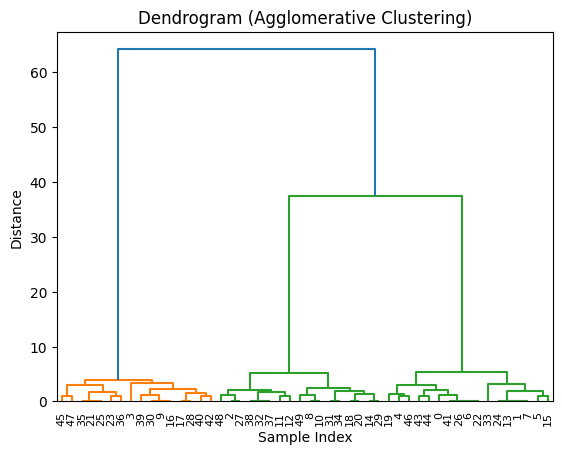

In [53]:
plt.Figure(figsize=(10,5))
dendrogram(linked, orientation="top", distance_sort="ascending", show_leaf_counts=True)
plt.title("Dendrogram (Agglomerative Clustering)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

# Perform Agglomerative Clustering

In [55]:
model = AgglomerativeClustering(n_clusters=3)
labels = model.fit_predict(X)
labels

array([0, 0, 2, 1, 0, 0, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 1, 2, 0, 2, 1,
       0, 1, 0, 1, 0, 2, 1, 2, 1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 2, 2])

In [64]:
X[:, 0]

array([-3, -2,  3, -9, -3, -1, -3, -2,  5, -7,  5,  4,  3, -2,  4, -1, -7,
       -6,  4, -4,  4, -7, -3, -6, -2, -7, -3,  3, -6,  4, -7,  5,  4,  0,
        5, -7, -6,  4,  4, -8, -7, -3, -6, -2, -2, -5, -3, -5,  3,  5])

In [65]:
X[:, 1]

array([10,  7,  1, -6,  7,  8,  9,  7,  2, -7,  2,  0,  0,  7,  3,  7, -7,
       -7,  2,  8,  2, -6,  9, -6,  7, -6,  9,  1, -7,  3, -7,  3,  1,  9,
        3, -6, -5,  1,  1, -7, -8,  9, -8,  8,  9, -7,  8, -6,  2,  1])

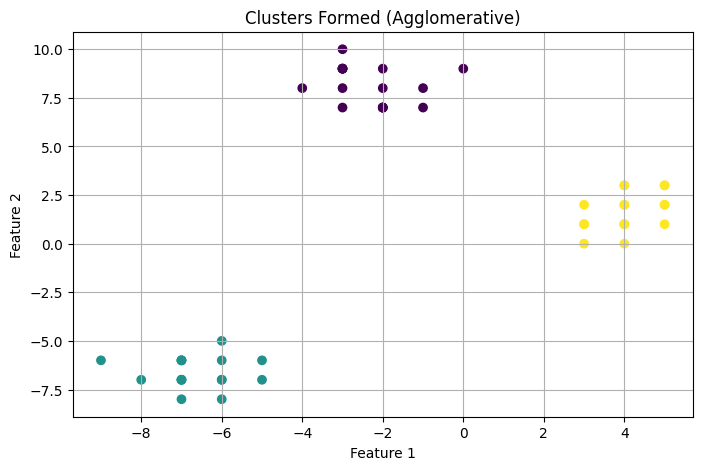

In [74]:
# 4. Plot final clusters
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title("Clusters Formed (Agglomerative)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

# 📌 Approach 2: Divisive Clustering (Top-Down)
Divisive Clustering isn't natively supported in scikit-learn, but we can simulate it using a recursive bisecting KMeans.

In [79]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

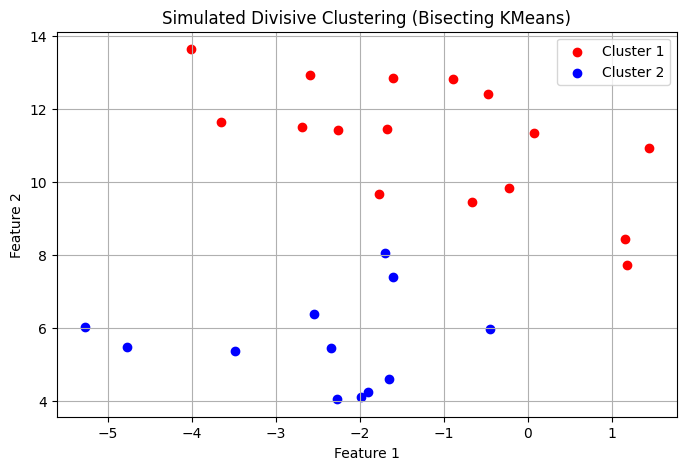

In [85]:
# Simulated Divisive Clustering: Bisecting KMeans (split into 2, then keep splitting)
def divisive_clustering(data, depth=2):
    clusters = [data]
    final_clusters = []
    for _ in range(depth):
        new_clusters = []
        for cluster in clusters:
            if len(cluster) <= 1:
                continue
            kmeans = KMeans(n_clusters=3, random_state=42)
            labels = kmeans.fit_predict(cluster)
            new_clusters.append(cluster[labels == 0])
            new_clusters.append(cluster[labels == 1])
        clusters = new_clusters
    return clusters
divided = divisive_clustering(X,depth=1)
# Plot results
colors = ['red', 'blue', 'green', 'purple', 'orange']
plt.figure(figsize=(8, 5))
for i, cluster in enumerate(divided):
    plt.scatter(cluster[:, 0], cluster[:, 1], color=colors[i % len(colors)], label=f"Cluster {i+1}")
plt.title("Simulated Divisive Clustering (Bisecting KMeans)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

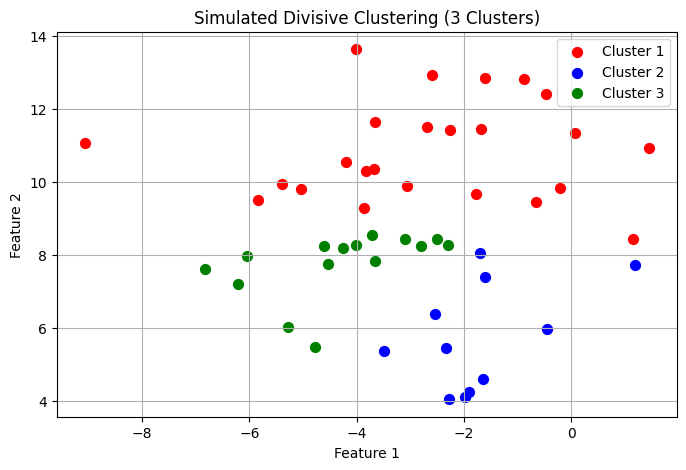

In [86]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Generate data
X, _ = make_blobs(n_samples=50, centers=1, cluster_std=2.5, random_state=42)

# Simulated Divisive Clustering: Stop when you reach exactly 3 clusters
def divisive_clustering(data, k=3):
    clusters = [data]

    while len(clusters) < k:
        # Find the largest cluster to split
        largest_idx = np.argmax([len(c) for c in clusters])
        largest_cluster = clusters.pop(largest_idx)

        if len(largest_cluster) <= 1:
            clusters.append(largest_cluster)
            continue

        # Split this cluster into two using KMeans
        kmeans = KMeans(n_clusters=2, random_state=42)
        labels = kmeans.fit_predict(largest_cluster)
        clusters.append(largest_cluster[labels == 0])
        clusters.append(largest_cluster[labels == 1])

    return clusters

# Apply divisive clustering to get 3 clusters
divided = divisive_clustering(X, k=3)

# Plot the result
colors = ['red', 'blue', 'green', 'purple', 'orange']
plt.figure(figsize=(8, 5))
for i, cluster in enumerate(divided):
    plt.scatter(cluster[:, 0], cluster[:, 1], color=colors[i % len(colors)], label=f"Cluster {i+1}", s=50)
plt.title("Simulated Divisive Clustering (3 Clusters)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


# Conclusion

**Hierarchical Clustering** is a clustering technique that builds nested groups of data points, forming a hierarchy. It doesn’t involve trees like decision trees; instead, it constructs a dendrogram, which is a tree-like diagram used to visualize how individual data points or smaller clusters are merged together step by step based on a distance metric.

**There are two main types of hierarchical clustering:**

**Agglomerative (Bottom-Up):** Starts with each data point as its own cluster and gradually merges the closest pairs of clusters.

**Divisive (Top-Down):** Starts with all data points in one cluster and splits them into smaller clusters recursively.

The output is a hierarchy of clusters — not a model with decision rules — and it's especially useful when you want to understand the data structure or determine the number of natural groupings without predefining it.